In [1]:
#%%
from utils.config import Config

import pandas as pd
import time

#%%

c = Config() 
c.validate_files()



fileexists                                  filename  \
type        origin                                                              
predicted   18M                True                         18M_PREDICTED.csv   
small       18M               False                             18M_small.csv   
uid         18M                True                               18M_uid.csv   
predicted   300K               True                        300k_PREDICTED.csv   
small       300K              False                            300K_small.csv   
uid         300K               True                              300K_uid.csv   
reference   reference          True                       layercategories.csv   
descriptors descriptors        True   descriptors/lasso_monolayer_data_IE.csv   
            descriptors        True  descriptors/lasso_monolayer_data_C33.csv   

                                                        filepaths  
type        origin                                                 
predicted   18M                  data/ML_IE_C33/18M_PREDICTED.csv  
small       18M                      data/ML_IE_C33/18M_small.csv  
uid         18M                        data/ML_IE_C33/18M_uid.csv  
predicted   300K                data/ML_IE_C33/300k_PREDICTED.csv  
small       300K                    data/ML_IE_C33/300K_small.csv  
uid         300K                                     300K_uid.csv  
reference   reference          data/ML_IE_C33/layercategories.csv  
descriptors descriptors   descriptors/lasso_monolayer_data_IE.csv  
            descriptors  descriptors/lasso_monolayer_data_C33.csv

In [2]:
#%%
df1 = pd.read_csv(c.uid_300K)
df1_columns_index = [15, 2,3,5,7,8,9,10,11,12]
df1_columns_labels = ['uid','bilayer', 'monolayer1','monolayer2','IE','IE_error','IE_rel_error','C33','C33_error','C33_rel_err']
df1 = df1.iloc[:, df1_columns_index]
df1.columns = df1_columns_labels

/data/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df1.head()

,uid,bilayer,monolayer1,monolayer2,IE,IE_error,IE_rel_error,C33,C33_error,C33_rel_err
0,Hf3Te2_Mo1S2-T1,Hf3Te2_Mo1S2-T1,Hf3Te2,Mo1S2-T1,-0.698046,0.081306,0.058239,36.954759,6.369837,0.086184
1,Hf3Te2_W1S2-T1,W1S2-T1_Hf3Te2,W1S2-T1,Hf3Te2,-0.677167,0.080142,0.059174,44.432743,7.523579,0.084663
2,Cr1S2-T1_Hf3Te2,Hf3Te2_Cr1S2-T1,Hf3Te2,Cr1S2-T1,-0.661212,0.074767,0.056538,54.217246,11.076879,0.102153
3,Ca2La2I10-T1_Ti2Ge2O6,Ti2Ge2O6_Ca2La2I10-T1,Ti2Ge2O6,Ca2La2I10-T1,-0.658413,0.117797,0.089456,49.623362,18.454026,0.185941
4,Ca2La2I10-T1_Ta3Te1I7,Ca2La2I10-T1_Ta3Te1I7,Ca2La2I10-T1,Ta3Te1I7,-0.657006,0.083776,0.063756,28.505406,4.794372,0.084096


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
#https://python-graph-gallery.com/90-heatmaps-with-various-input-format/

In [ ]:
df1_IE_wide=df1.pivot_table( index='monolayer1', columns='monolayer2', values='IE' )

In [10]:
df1_IE_wide

<class 'pandas.core.frame.DataFrame'>
Index: 770 entries, Ag1Bi1P2Se6 to Zr4H2Br4
Columns: 770 entries, Ag1Bi1P2Se6 to Zr4H2Br4
dtypes: float64(770)
memory usage: 4.5+ MB


monolayer2,Ag1Bi1P2Se6,Ag2F4,Ag2I2,Ag2O4F2,Al1Pd5I2,Al2Cl2O2,Al2Cl6,Al2H2O4,Al2H2O4-T1,Al2H6O6,...,Zr2I4,Zr2N2Cl2,Zr2S6,Zr2Se6,Zr2Te10,Zr2Te2P1,Zr2Te6,Zr3Mo6O24,Zr3Te6Cl36,Zr4H2Br4
monolayer1,,,,,,,,,,,,,,,,,,,,,
Ag1Bi1P2Se6,-0.457226,-0.363349,-0.455063,-0.284593,-0.440308,-0.269925,-0.280975,-0.380400,-0.377230,-0.408263,...,-0.464418,-0.276382,-0.457628,-0.474675,-0.455308,-0.424460,-0.404133,-0.345473,-0.389580,-0.503438
Ag2F4,NaN,-0.384801,NaN,NaN,-0.365894,NaN,NaN,NaN,NaN,-0.375824,...,NaN,NaN,NaN,-0.356161,-0.391945,NaN,-0.414252,NaN,NaN,NaN
Ag2I2,NaN,-0.408929,-0.409457,NaN,-0.386114,NaN,NaN,NaN,NaN,-0.409358,...,NaN,NaN,NaN,-0.423134,-0.376454,NaN,-0.378432,NaN,NaN,NaN
Ag2O4F2,NaN,-0.296535,-0.357543,-0.256574,-0.277534,-0.231159,-0.232965,NaN,NaN,-0.281182,...,NaN,NaN,NaN,-0.289820,-0.345468,-0.371490,-0.357982,NaN,NaN,NaN
Al1Pd5I2,NaN,NaN,NaN,NaN,-0.357343,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.404159,NaN,NaN,-0.374023,NaN,NaN,NaN
Al2Cl2O2,NaN,-0.262816,-0.234352,NaN,-0.270586,-0.229075,-0.219026,NaN,NaN,-0.268015,...,NaN,NaN,NaN,-0.253808,-0.225775,-0.272176,-0.244751,NaN,NaN,NaN
Al2Cl6,NaN,-0.261682,-0.239996,NaN,-0.266708,NaN,-0.217279,NaN,NaN,-0.261516,...,NaN,NaN,NaN,-0.262080,-0.221276,-0.295276,-0.263298,NaN,NaN,NaN
Al2H2O4,NaN,-0.354330,-0.409677,-0.275739,-0.324002,-0.266642,-0.261357,-0.324383,-0.327143,-0.336703,...,NaN,-0.268795,NaN,-0.373043,-0.358281,-0.405635,-0.386314,NaN,NaN,-0.494130
Al2H2O4-T1,NaN,-0.355186,-0.416937,-0.278289,-0.318548,-0.266089,-0.262057,NaN,-0.328264,-0.337892,...,NaN,NaN,NaN,-0.384179,-0.383341,-0.404755,-0.391477,NaN,NaN,-0.493319


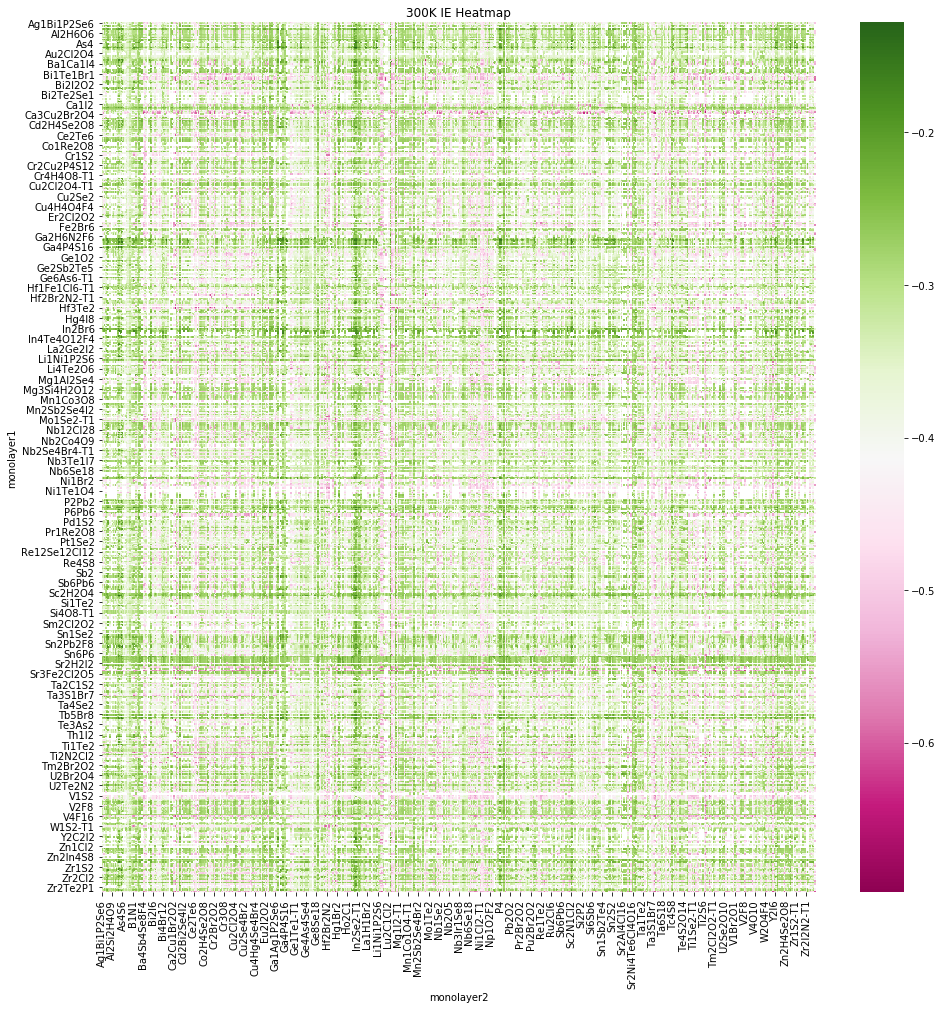

In [5]:

plt.figure(figsize=(16, 16))
heatmap_IE=sns.heatmap( df1_IE_wide, cmap="PiYG" )
plt.title('300K IE Heatmap')
plt.savefig('plots/300K_IE_heatmap.png', transparent=True)


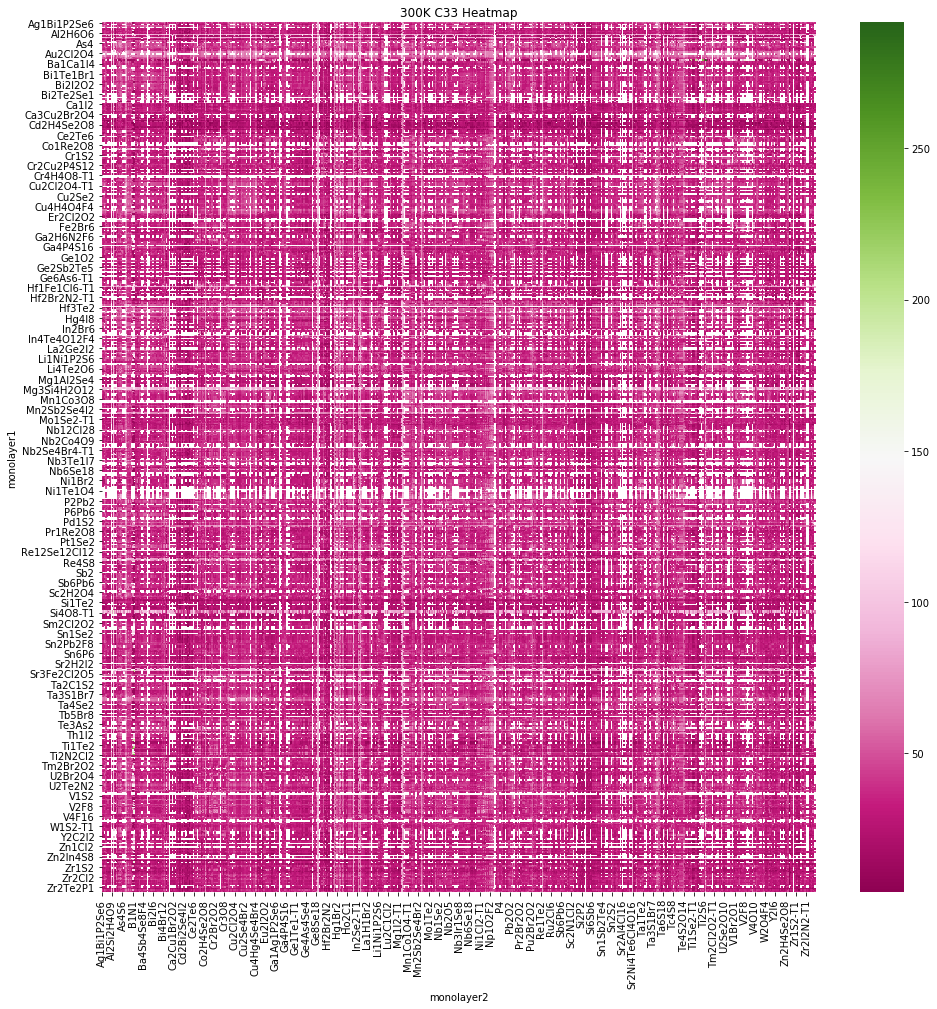

In [21]:
df1_C33_wide=df1.pivot_table( index='monolayer1', columns='monolayer2', values='C33' )
plt.figure(figsize=(16, 16))
heatmap_C33=sns.heatmap( df1_C33_wide,cmap="PiYG" )
plt.title('300K C33 Heatmap')
plt.savefig('plots/300K_C33_heatmap.png', transparent=True)


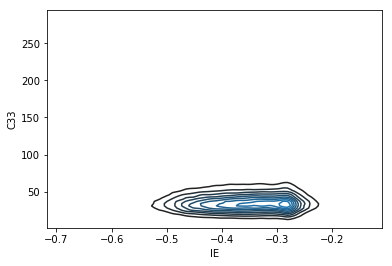

In [22]:
# calculate kernel density estimate and represent it as a contour plot
plt.figure(figsize=(16, 16))
sns.kdeplot(df1.IE, df1.C33)
plt.title('300K KDE IE C33')
plt.savefig('plots/300K_kde_IE_C33.png', transperant=True)

NameError: name 'y' is not defined

<Figure size 1152x1152 with 0 Axes>

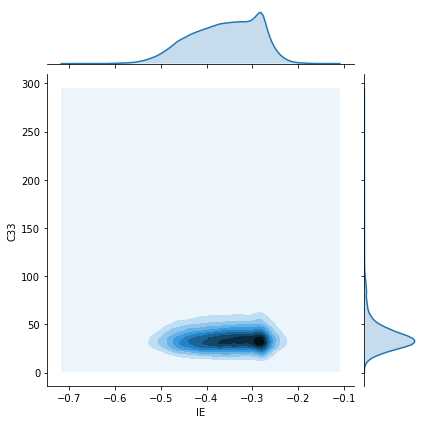

In [32]:
# 2D density + marginal distribution 
plt.figure(figsize=(16, 16))
sns.jointplot(df1.IE,df1.C33, kind='kde')
plt.title('300K 2D density + marginal distribution  IE C33', y-1.2)
plt.savefig('plots/300K_kde_marginaldist_IE_C33.png', transperant=True)


In [ ]:
# do the same density plot on the 18M

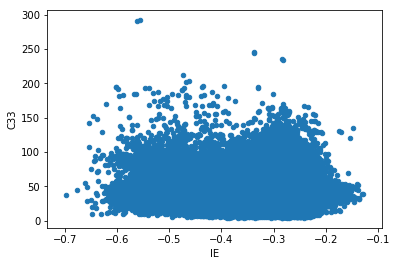

In [30]:
plt.figure(figsize=(16, 16))
df1[['IE','C33']].plot.scatter(0,1)
plt.title('300K scatter plot of IE and C33')
plt.savefig('plots/300K_s_IE_C33.png', transperant=True)